# Tarea 1: Diferenciación
---


Andrea Rocha Barajas *202311471*

Gabriela Rodriguez Jaimes *202320229*

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import ast


### 2.0.2   Máximos

1.  Descargue los datos de: https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/EstrellaEspectro.txt
Diseñe un algoritmo para encontrar todos los máximos locales en esta serie de datos.  La Figura [2.1] muestrala serie de datos y los máximos locales.

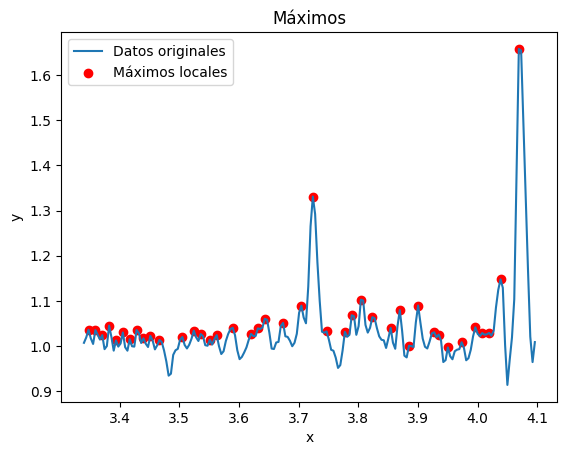

In [3]:
estrella = np.loadtxt("https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/EstrellaEspectro.txt")
estrella = np.sort(estrella)
datos = [f"[{x[0]}, {x[1]}]" for x in estrella]
listas = [ast.literal_eval(s) for s in datos]
arr = np.array(listas)
x = arr[:, 1]
y = arr[:, 0]
X,Y = np.meshgrid(x,y)


def maximos(arr):
    maximos = []
    for i in range(1, len(arr) - 1):
        if arr[i] > arr[i - 1] and arr[i] > arr[i + 1]:
            maximos.append(i)
    return maximos

indices_maximos = maximos(y)
x1 = x[indices_maximos]
y1 = y[indices_maximos]
plt.plot(x, y, label='Datos originales')
plt.scatter(x1, y1, color='red', label='Máximos locales')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Máximos")
plt.legend()
plt.show()


### 2.0.5 Espiral de arquímedes.

a)  La  espiral  de  arquímedes  está  descrita  por  la  siguiente  ecuación  en  coordenadas polares:

r=a+bθ


Haga a=0 y b=1 y calcule las posiciones r entre θ ∈ [0.,2π].


In [4]:
a = 0
b = 1
theta = np.linspace(0, 2*np.pi, 100)
r = a + b * theta

def posiciones_R(a,b,theta):
  return a + b * theta

r = posiciones_R(a,b,theta)

(b)  Haga el cambio de coordenadas y gráfique la espiral.

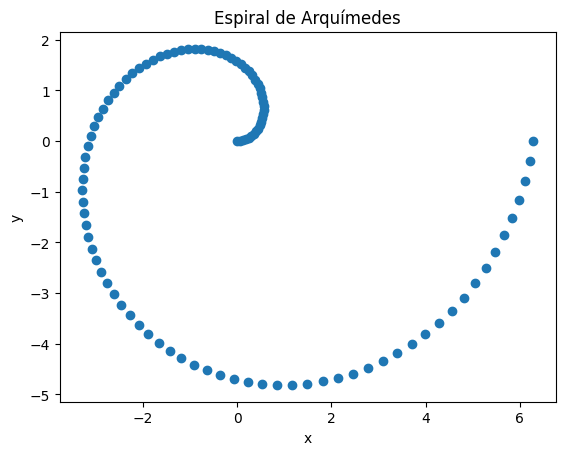

In [5]:
def cambio_coordenadas(r, theta):
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y

x,y =  cambio_coordenadas(r,theta)

plt.scatter(x,y)
plt.title("Espiral de Arquímedes")
plt.xlabel('x')
plt.ylabel('y')
plt.show()


## Ejercicios: Derivación
Ejercicios 1,2,5 y 6

### 1. (Theoretical) Demuestre la formula alternativa para la estimación de la segunda derivada discreta:

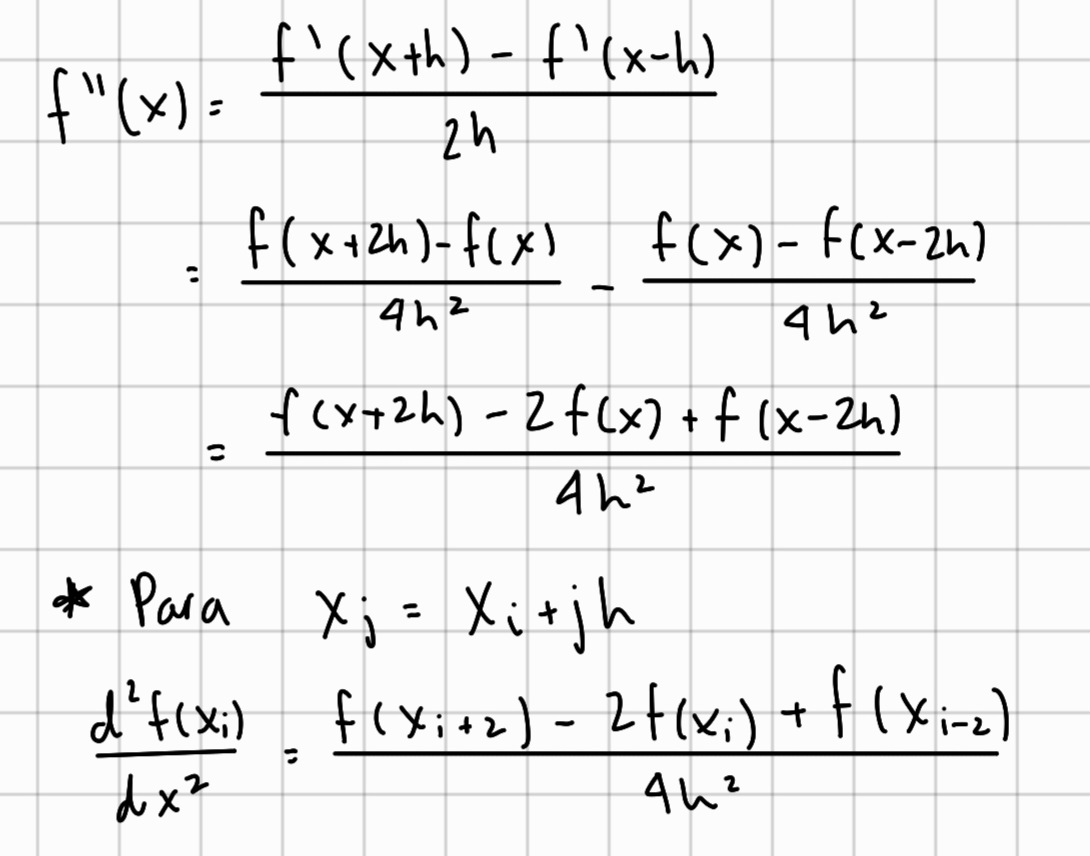

###2. Usando la definición de derivada central (con h = 0.05) estime la derivada de la función:

a) En el intervalo −10 ≤ x ≤ 10.

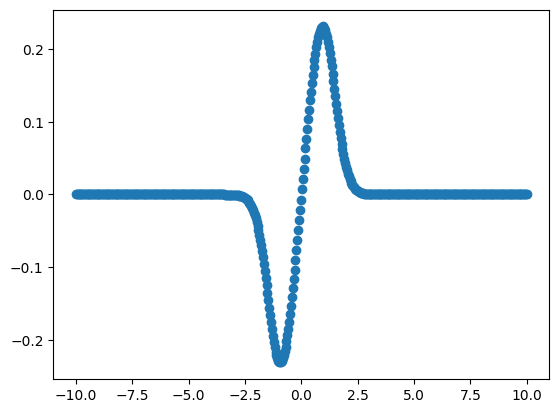

In [6]:
def f(x):
  return 1/(np.sqrt(1+np.exp(-x**2)))

def Derivative(f,x,h=0.05):
  return (f(x+h)-f(x-h))/(2*h)

x = np.linspace(-10,10,500)
derivada = Derivative(f,x)
plt.scatter(x,derivada)

b) Para el intervalo anterior, estimar el error en cada punto nodal.

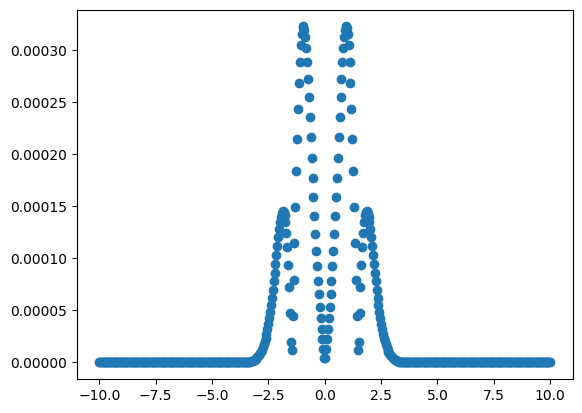

In [7]:
def Derivada_teorica(x):
    return (np.exp(-x**2) * x) / (1 + np.exp(-x**2))**(3/2)

teorica = Derivada_teorica(x)

error = np.abs(teorica - derivada)

plt.scatter(x,error)

###5. (Theoretical) Show that the D4 f operator is given by:
For this operator, what is the order (O(hk)) of the approximation?

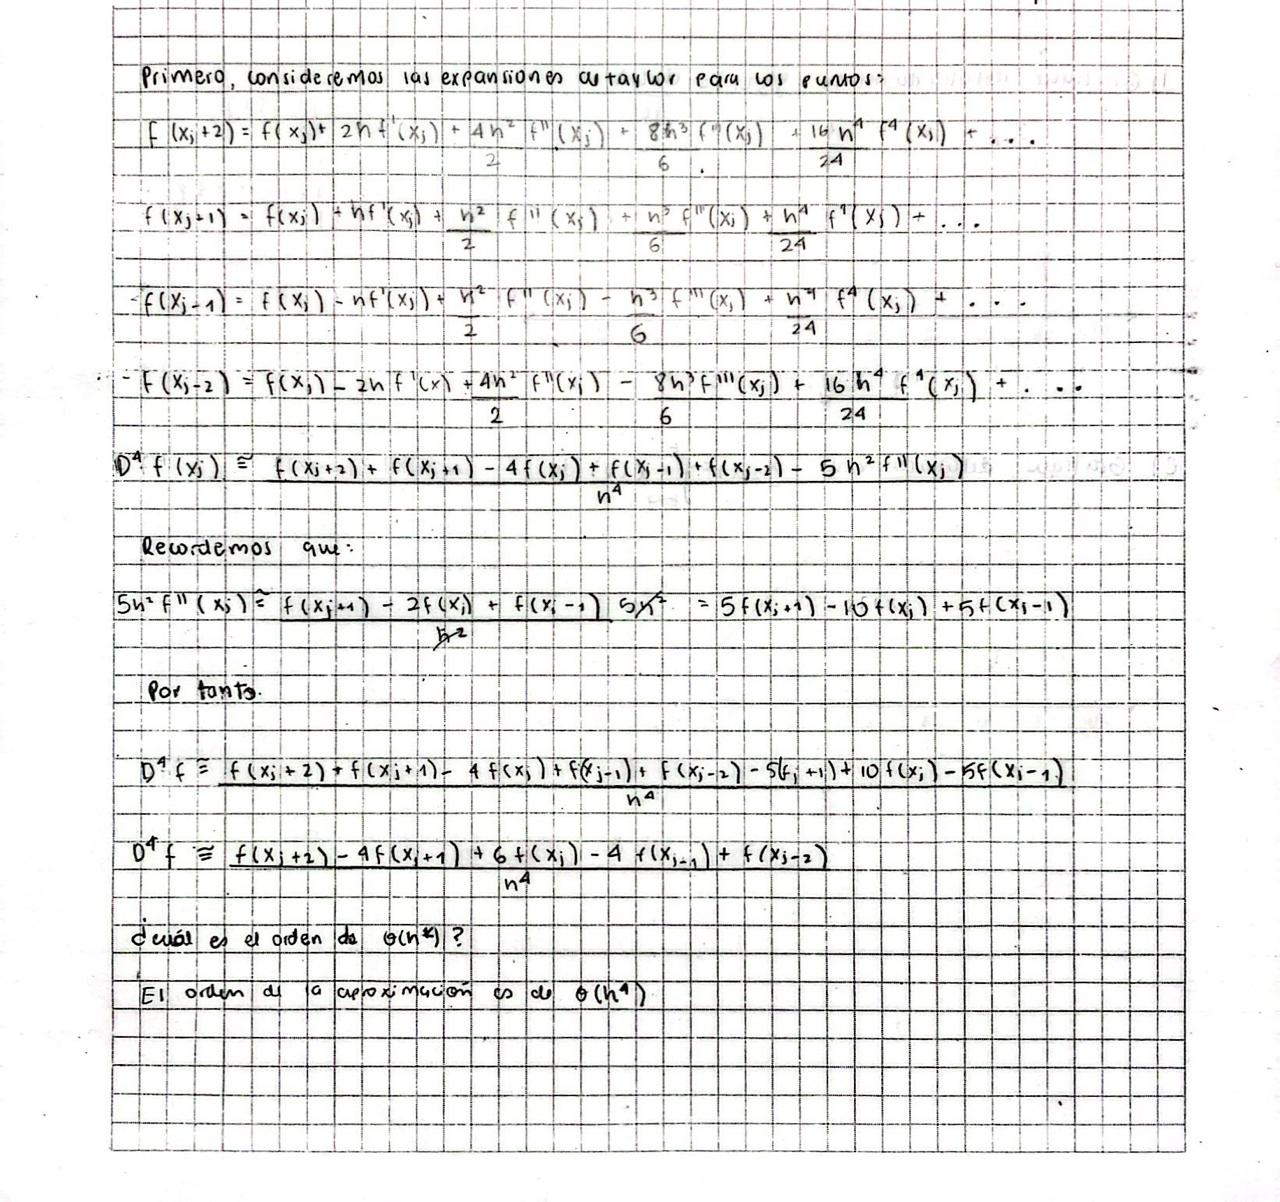

###6. Calcular el campo de velocidades cerca de la superficie de un cilindro de radio R = 2 cm.

a) Definir una discretización en los ejes x e y, donde la región es: A ∈ [−4, 4] con 25 puntos en cada eje.


In [8]:
x = np.linspace(-4,4,25)
y = np.linspace(-4,4,25)
X, Y = np.meshgrid(x, y)

b) Definir la función potencial del flujo,
donde V = 2 cm/s


In [9]:
def potencial_flujo(x,y,V,R):
  with np.errstate(divide='ignore', invalid='ignore'):
    potencial= V*x*(1-((R**2)/(x**2+y**2)))
    return potencial

V = 2
R = 2
h=0.001


In [10]:
potencial_flujo(x,y,V,R)

array([ -7.        ,  -6.24242424,  -5.46666667,  -4.66666667,
        -3.83333333,  -2.95238095,  -2.        ,  -0.93333333,
         0.33333333,   2.        ,   4.66666667,  11.33333333,
                nan, -11.33333333,  -4.66666667,  -2.        ,
        -0.33333333,   0.93333333,   2.        ,   2.95238095,
         3.83333333,   4.66666667,   5.46666667,   6.24242424,
         7.        ])

c) Calcule y guarde adecuadamente el campo de velocidades usando la definición de
derivada parcial central.
Use h = 0.001. Note que al interior del cilindro el campo de velocidades debe ser igual
a cero.


In [11]:
potencial_flujo(x,y,V,R)

dphi_dx = (potencial_flujo(X + h, Y, V, R) - potencial_flujo(X - h, Y, V, R)) / (2 * h)
dphi_dy = (potencial_flujo(X, Y + h, V, R) - potencial_flujo(X, Y - h, V, R)) / (2 * h)

Vx = dphi_dx
Vy =-1*dphi_dy

mask = np.sqrt(X**2 + Y**2) < R
Vx[mask] = 0
Vy[mask] = 0



d) Dibuje el campo de velocidades usando el método: ax.quiver(x[i],y[j],Vx[i,j],Vy[i,j]).
:

/usr/local/lib/python3.10/dist-packages/matplotlib/quiver.py:646: RuntimeWarning: divide by zero encountered in scalar divide
  length = a * (widthu_per_lenu / (self.scale * self.width))
/usr/local/lib/python3.10/dist-packages/matplotlib/quiver.py:646: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


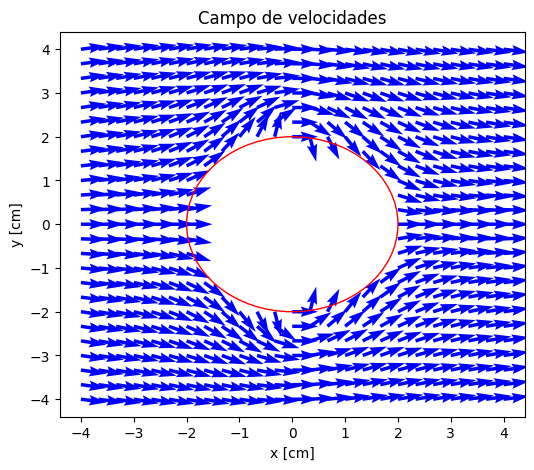

In [12]:
fig, ax = plt.subplots(figsize=(6, 5))
for i in range(len(y)):
    for j in range(len(x)):
        ax.quiver(x[i], y[j], Vx[j, i], Vy[j, i], color="blue")

circle = patches.Circle((0, 0), radius=R, edgecolor='red', fill=False)
ax.add_patch(circle)

ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_title('Campo de velocidades')
plt.show()